In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [12]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I am already in Portugal so...
1,✅ Trip Verified | Terrible. Avoid this airlin...
2,✅ Trip Verified | Despite being a gold member...
3,Not Verified | Regarding the aircraft and seat...
4,Not Verified | I travelled with British Airway...


In [13]:
df.to_csv("C:/Users/tahao/Desktop/Forage_BA.csv")


In [17]:
import sys
print(sys.executable)



c:\Users\tahao\AppData\Local\Programs\Python\Python39\python.exe


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tahao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


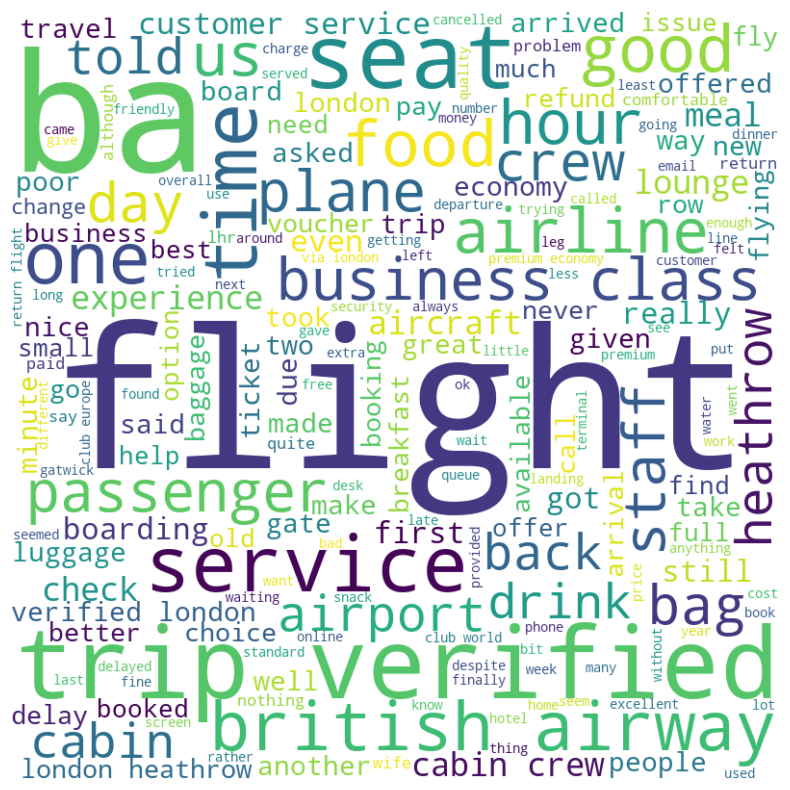

In [18]:


import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Read the CSV file
data = pd.read_csv("C:/Users/tahao/Desktop/Forage_BA.csv")

# Clean the data
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

data["cleaned_reviews"] = data["reviews"].apply(clean_text)

# Create a word cloud
all_words = " ".join(review for review in data["cleaned_reviews"])
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [19]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['cleaned_reviews'].apply(analyze_sentiment)


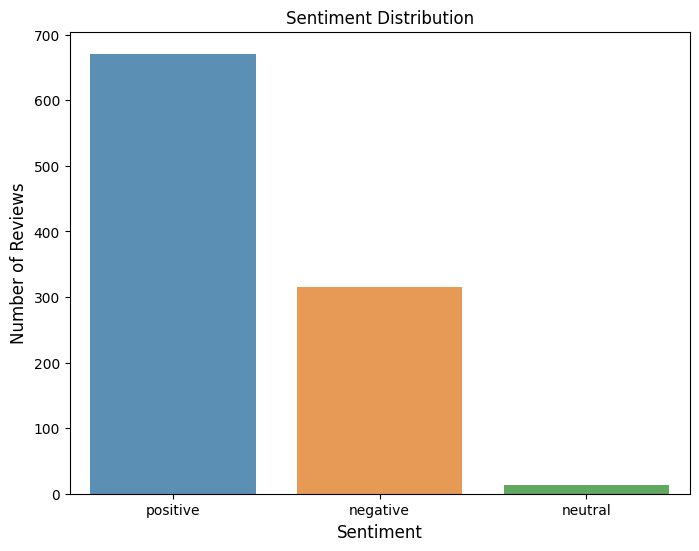

In [21]:
import seaborn as sns

sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()


In [22]:
total_reviews = len(data)
positive_percentage = (sentiment_counts['positive'] / total_reviews) * 100
negative_percentage = (sentiment_counts['negative'] / total_reviews) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_reviews) * 100

print(f"Positive reviews: {positive_percentage:.2f}%")
print(f"Negative reviews: {negative_percentage:.2f}%")
print(f"Neutral reviews: {neutral_percentage:.2f}%")


Positive reviews: 67.10%
Negative reviews: 31.60%
Neutral reviews: 1.30%


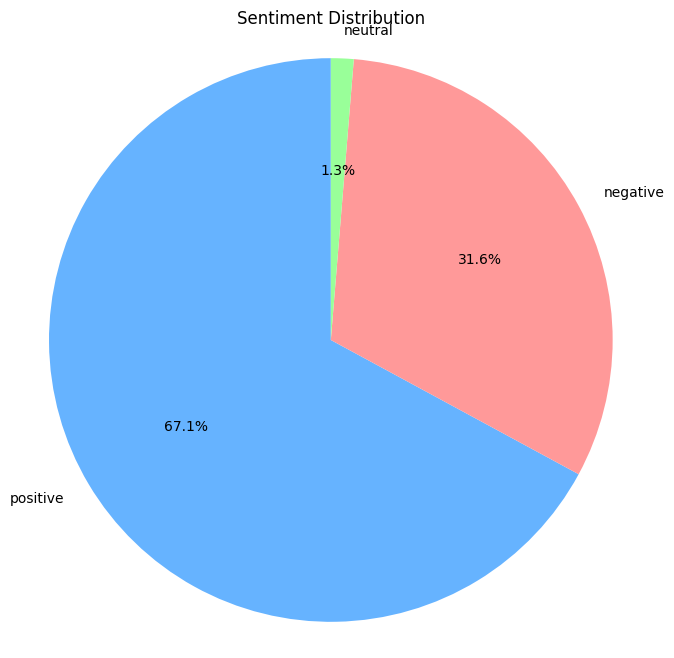

In [23]:
sentiment_counts = data['sentiment'].value_counts()
colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()


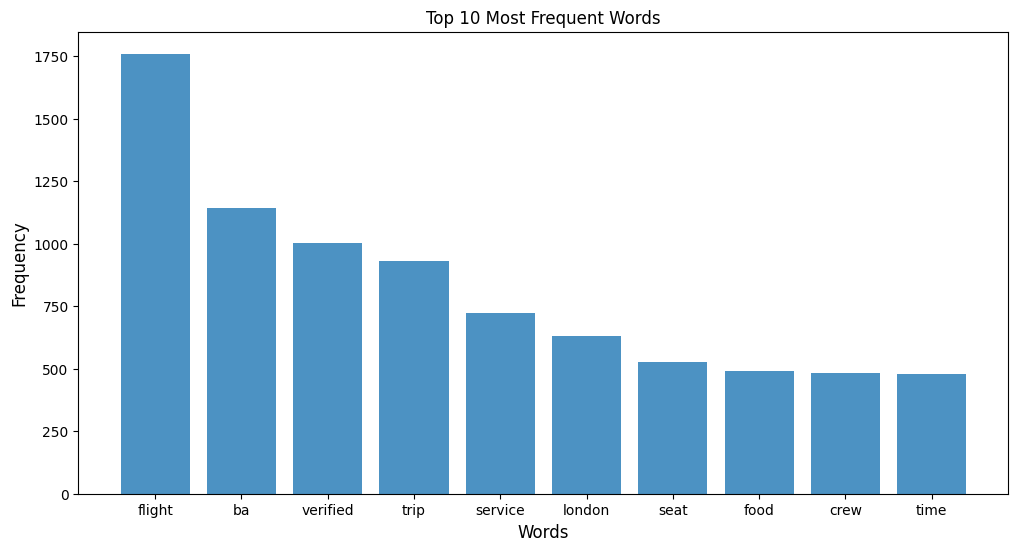

In [25]:
from collections import Counter

def word_frequency(text_list, top_n):
    all_words = " ".join(text for text in text_list)
    tokens = all_words.split()
    freq_dist = Counter(tokens)
    return freq_dist.most_common(top_n)

top_words = 10
frequent_words = word_frequency(data['cleaned_reviews'], top_words)

word_labels, word_counts = zip(*frequent_words)

plt.figure(figsize=(12, 6))
plt.bar(word_labels, word_counts, alpha=0.8)
plt.title(f'Top {top_words} Most Frequent Words')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.show()

